In [1]:
# Imports at the top
import json
import urllib
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# A clear problem statement & description of the goals of your study to be included in the final report
print "Problem Statement: What factors are the most direct predictors of the IMDB rating?"
print "\n"

print "Answer: imdbVotes is by far the most important feature at 41% importance to the model predictions. This was determined with a model that has a .52 R2 score using a Random Forest Model"
print df_important_features
print "\n"

print "Dashboard on Website Link: https://mattbrown3255.herokuapp.com/site/IMDB_Dashboard/"
print "\n"

print "Blog Link: http://mattbrownblog.tumblr.com/post/153194708719/learning-to-code-part-4-decision-trees-and"

Problem Statement: What factors are the most direct predictors of the IMDB rating?


Answer: imdbVotes is by far the most important feature at 41% importance to the model predictions. This was determined with a model that has a .52 R2 score using a Random Forest Model
         Feature  Importance %
0      imdbVotes      0.412099
1           Year      0.280609
2  Gross_Revenue      0.204644
3      Metascore      0.097621
4          PG-13      0.004938
5      NOT RATED      0.000089


Dashboard on Website Link: https://mattbrown3255.herokuapp.com/site/IMDB_Dashboard/


Blog Link: http://mattbrownblog.tumblr.com/post/153194708719/learning-to-code-part-4-decision-trees-and


# Load the data into a DataFrame

In [3]:
# Get all the Movie IDs for the top 250 movies
from bs4 import BeautifulSoup
import urllib2

page_imdb = urllib2.urlopen('http://www.imdb.com/chart/top', 'lxml')
soup = BeautifulSoup(page_imdb.read())

tables_imdb = soup.findAll('tbody', attrs ={"class" : "lister-list"})
print len(tables_imdb)

/Users/Madballa55/anaconda/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/Madballa55/anaconda/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


1


In [4]:
# Get all the Movie IDs for the top 250 movies

listy_movie_ids = []

for tid in tables_imdb[0].find_all('tr'):
    listy_movie_ids.append(tid.find('div', attrs ={"class" : "seen-widget"}).attrs['data-titleid'])

print len(listy_movie_ids)
print listy_movie_ids[0:5]


250
['tt0111161', 'tt0068646', 'tt0071562', 'tt0468569', 'tt0050083']


In [9]:
# Get all of the data from open API.
# http://www.omdbapi.com/?i=tt0111161&plot=short&r=json

list_of_dicty = []

for movie_id in listy_movie_ids:
    soup = BeautifulSoup(urllib2.urlopen('http://www.omdbapi.com/?i='+ movie_id + '&plot=short&r=json').read())
    parsed_json = json.loads(soup.text)
    
    list_of_dicty.append(parsed_json)

df_imdb = pd.DataFrame(list_of_dicty)

print len(df_imdb)
df_imdb.info()
df_imdb.head()

250
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
Actors        250 non-null object
Awards        250 non-null object
Country       250 non-null object
Director      250 non-null object
Genre         250 non-null object
Language      250 non-null object
Metascore     250 non-null object
Plot          250 non-null object
Poster        250 non-null object
Rated         250 non-null object
Released      250 non-null object
Response      250 non-null object
Runtime       250 non-null object
Title         250 non-null object
Type          250 non-null object
Writer        250 non-null object
Year          250 non-null object
imdbID        250 non-null object
imdbRating    250 non-null object
imdbVotes     250 non-null object
dtypes: object(20)
memory usage: 39.1+ KB


,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 19 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80,Two imprisoned men bond over a number of years...,https://images-na.ssl-images-amazon.com/images...,R,14 Oct 1994,True,142 min,The Shawshank Redemption,movie,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,"1,725,904"
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100,The aging patriarch of an organized crime dyna...,https://images-na.ssl-images-amazon.com/images...,R,24 Mar 1972,True,175 min,The Godfather,movie,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,"1,177,812"
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80,The early life and career of Vito Corleone in ...,https://images-na.ssl-images-amazon.com/images...,R,20 Dec 1974,True,202 min,The Godfather: Part II,movie,"Francis Ford Coppola (screenplay), Mario Puzo ...",1974,tt0071562,9.0,"807,734"
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82,N/A,https://images-na.ssl-images-amazon.com/images...,PG-13,18 Jul 2008,True,152 min,The Dark Knight,movie,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,tt0468569,9.0,"1,711,711"
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,N/A,N/A,https://images-na.ssl-images-amazon.com/images...,APPROVED,01 Apr 1957,True,96 min,12 Angry Men,movie,"Reginald Rose (story), Reginald Rose (screenplay)",1957,tt0050083,8.9,"460,420"


In [5]:
# Get Gross Revenue Data via web scrape

def gross_rev(movie_id):
    page_imdb_gross_rev = urllib2.urlopen('http://www.imdb.com/title/' + movie_id, 'lxml')
    soup = BeautifulSoup(page_imdb_gross_rev.read())
    gross = 0.0

    for a in soup.findAll('div', attrs ={"id" : "titleDetails"}):
        for b in a.findAll('div', attrs ={"class" : "txt-block"}):
            if 'Gross' in b.text:
                gross = float(b.text.split('$')[1].split(' ')[0].replace(',',''))
    
    return gross

gross_rev('tt0111161')

28341469.0

In [6]:
listy_gross_revenue = []

for movie_id in listy_movie_ids:
    listy_gross_revenue.append(gross_rev(movie_id))
    
print len(listy_gross_revenue)
print sum(listy_gross_revenue)
print listy_gross_revenue[0:5]

250
18846867276.0
[28341469.0, 134821952.0, 57300000.0, 533316061.0, 0.0]


In [10]:
# Add gross revenue column to IMDB API data.
df_imdb['Gross_Revenue'] = listy_gross_revenue

In [11]:
# Check if there are null values. Be careful they may appear to be valid strings.
for x in df_imdb.columns.values:
    if sum(df_imdb[x].isnull()) > 0:
        print x, sum(df_imdb[x].isnull())
        
# Removing N/A's
df_imdb = df_imdb[df_imdb.Released != 'N/A']

# Replacing "N/A" with average Metascore
meta_avg = np.mean([float(x) for x in df_imdb.Metascore if x != 'N/A'])
df_imdb['Metascore'] = [x.replace('N/A', str(meta_avg)) for x in df_imdb['Metascore']]
df_imdb['Metascore'] = [float(x) for x in df_imdb['Metascore']]


# Making index clean
df_imdb.index = range(0,249)

# Convert the columns to the appropriate formats
df_imdb.Released = pd.to_datetime(df_imdb.Released, format='%d %b %Y')
df_imdb.Runtime = [float(x.split(' ')[0]) for x in df_imdb.Runtime]
df_imdb.Year = df_imdb.Year.astype(int)
df_imdb.imdbRating = df_imdb.imdbRating.astype(float)
df_imdb.imdbVotes = [float(x.replace(',','')) for x in df_imdb.imdbVotes]


df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 21 columns):
Actors           249 non-null object
Awards           249 non-null object
Country          249 non-null object
Director         249 non-null object
Genre            249 non-null object
Language         249 non-null object
Metascore        249 non-null float64
Plot             249 non-null object
Poster           249 non-null object
Rated            249 non-null object
Released         249 non-null datetime64[ns]
Response         249 non-null object
Runtime          249 non-null float64
Title            249 non-null object
Type             249 non-null object
Writer           249 non-null object
Year             249 non-null int64
imdbID           249 non-null object
imdbRating       249 non-null float64
imdbVotes        249 non-null float64
Gross_Revenue    249 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(14)
memory usage: 42.8+ KB


In [12]:
df_imdb = df_imdb.dropna()

print 'rows: ', len(df_imdb)
print 'columns: ',len(df_imdb.columns.values)

rows:  249
columns:  21


In [13]:
# Create words in list into columns with dummy variables
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=1000,
    ngram_range=(1, 2)
)
df_Plot = pd.DataFrame(v.fit_transform(df_imdb['Plot']).todense())
df_Plot.columns = v.get_feature_names()
df_Plot.head()

,000,1950s,24,abandoned,able,accident,accidentally,action,actress,advanced,...,writes,wrong,year,year old,years,york,young,young boy,young man,young woman
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Create words in list into columns with dummy variables
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=1000,
    ngram_range=(1, 2)
)
df_Actors = pd.DataFrame(v.fit_transform(df_imdb['Actors']).todense())
df_Actors.columns = v.get_feature_names()
df_Actors.head()

,aamir,aamir khan,abraham,adam,adrien,adrien brody,affleck,al,al pacino,alan,...,welles,willem,willem dafoe,william,william holden,williams,willis,woods,woody,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Create words in list into columns with dummy variables
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=1000,
    ngram_range=(1, 2)
)
df_Genre = pd.DataFrame(v.fit_transform(df_imdb['Genre']).todense())
df_Genre.columns = v.get_feature_names()
df_Genre.head()

,action,action adventure,action biography,action crime,action drama,action mystery,action sci,action thriller,adventure,adventure biography,...,noir thriller,romance,romance thriller,romance war,sci,sci fi,sport,thriller,war,western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Create dummy columns for Rated (R, PG, G, etc)
df_Rated = pd.DataFrame(pd.get_dummies(df_imdb['Rated']).astype(int))
df_Rated.info()
df_Rated.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 10 columns):
APPROVED     249 non-null int64
G            249 non-null int64
M            249 non-null int64
N/A          249 non-null int64
NOT RATED    249 non-null int64
PASSED       249 non-null int64
PG           249 non-null int64
PG-13        249 non-null int64
R            249 non-null int64
UNRATED      249 non-null int64
dtypes: int64(10)
memory usage: 21.4 KB


,APPROVED,G,M,N/A,NOT RATED,PASSED,PG,PG-13,R,UNRATED
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0


In [62]:
# Add in Review Data from https://github.com/richardasaurus/imdb-pie

from imdbpie import Imdb
imdb = Imdb()
imdb = Imdb(anonymize=True) # to proxy requests

class Review_API_Wrapper(object):
        def __init__(self, movie_id):
            self.movie_id = movie_id
        def rating(self):
            rating = imdb.get_title_reviews(self.movie_id, max_results=25)[x].rating
            if rating != "None":
                return rating
        def text(self):
            text = imdb.get_title_reviews(self.movie_id, max_results=25)[x].text
            if text != "None":
                return text
        def summary(self):
            summary = imdb.get_title_reviews(self.movie_id, max_results=25)[x].summary
            if summary != "None":
                return summary
        def user_score(self):
            user_score = imdb.get_title_reviews(self.movie_id, max_results=25)[x].user_score
            if user_score != "None":
                return user_score


listy_dicty_reviews = []

count = 0
for movie_id in listy_movie_ids[0:2]:
    imdb = imdb.get_title_reviews(self.movie_id, max_results=25)
    listy_dicty_reviews += [{
            'Review_ID': movie_id,
            'Review_Rating': [imdb[x].rating for x in range(3)],
            'Review_Text': [imdb[x].text for x in range(3)],
            'Review_Summary': [imdb[x].summary for x in range(3)],
            'Review_User_Score': [imdb[x].summary for x in range(3)]
         }]



df_reviews = pd.DataFrame(listy_dicty_reviews)

df_reviews.head()

,Review_ID,Review_Rating,Review_Summary,Review_Text,Review_User_Score
0,tt0111161,"[10, 10, None]","[Tied for the best movie I have ever seen, Sha...",[Why do I want to write the 234th comment on T...,"[2150, 1404, 1264]"
1,tt0068646,"[10, 10, 10]","[""The Godfather"" is pretty much flawless, and ...",[Rather than concentrating on everything that ...,"[717, 508, 408]"


In [17]:
# Exporting to CSV for Tableau Use
df_imdb_merged_csv = pd.concat([df_imdb, df_Actors,], axis=1, join_axes=[df_imdb.index])

df_imdb_merged_csv.to_csv('imdb.csv', sep='\t', encoding='utf-8')

In [18]:
# Append these columns to the merged dataframe.
df_imdb_merged = pd.concat([df_imdb, df_Actors, df_Genre, df_Rated], axis=1, join_axes=[df_imdb.index])

print "Columns: ", len(df_imdb_merged.columns.values)
print "Rows: ", len(df_imdb_merged)
print df_imdb_merged.columns.values

df_imdb_merged.head()


Columns:  1122
Rows:  249
[u'Actors' u'Awards' u'Country' ..., u'PG-13' u'R' u'UNRATED']


,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,...,APPROVED,G,M,N/A,NOT RATED,PASSED,PG,PG-13,R,UNRATED
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 19 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80.000000,Two imprisoned men bond over a number of years...,https://images-na.ssl-images-amazon.com/images...,R,...,0,0,0,0,0,0,0,0,1,0
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100.000000,The aging patriarch of an organized crime dyna...,https://images-na.ssl-images-amazon.com/images...,R,...,0,0,0,0,0,0,0,0,1,0
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80.000000,The early life and career of Vito Corleone in ...,https://images-na.ssl-images-amazon.com/images...,R,...,0,0,0,0,0,0,0,0,1,0
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82.000000,N/A,https://images-na.ssl-images-amazon.com/images...,PG-13,...,0,0,0,0,0,0,0,1,0,0
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,79.939024,N/A,https://images-na.ssl-images-amazon.com/images...,APPROVED,...,1,0,0,0,0,0,0,0,0,0


In [19]:
# Remove null values

df_imdb_merged = df_imdb_merged.dropna()

print 'rows: ', len(df_imdb_merged)
print 'columns: ',len(df_imdb_merged.columns.values)

rows:  249
columns:  1122


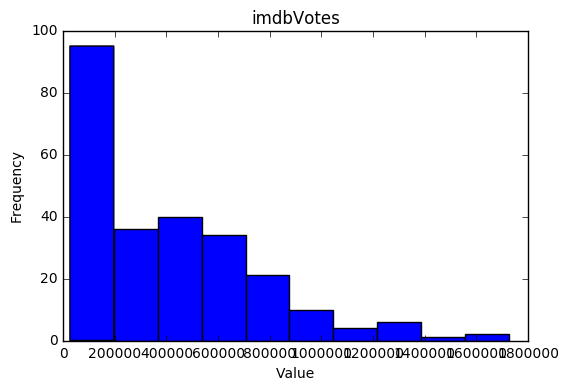

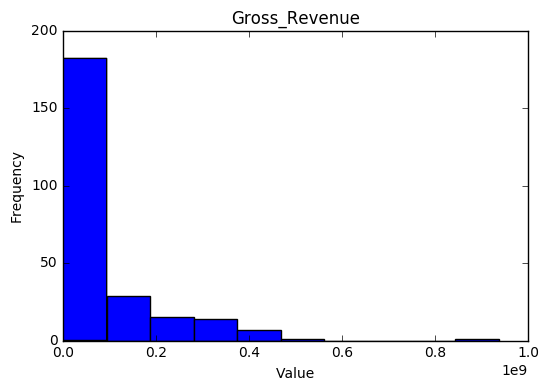

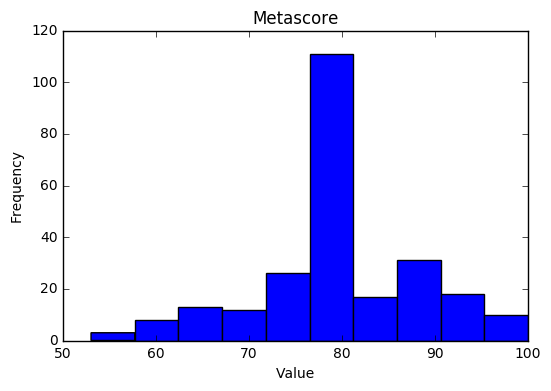

In [20]:
# Summary Statistics of X Variables

plt.hist(df_imdb_merged.imdbVotes)
plt.title("imdbVotes")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

plt.hist(df_imdb_merged.Gross_Revenue)
plt.title("Gross_Revenue")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

plt.hist(df_imdb_merged.Metascore)
plt.title("Metascore")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Create the Tree Model

In [23]:
# Scale and Create X, y Variables
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

scaler = StandardScaler()

# All numeric and dummy columns outside of target (rating)
# X = df_imdb_merged.drop('imdbRating', axis =1)._get_numeric_data()

X_num = df_imdb_merged[['imdbVotes','Year','Gross_Revenue','Metascore','R','PG','PG-13','NOT RATED','G']]
X = pd.DataFrame(scaler.fit_transform(X_num), columns =['imdbVotes','Year','Gross_Revenue',
                                                        'Metascore','R','PG','PG-13','NOT RATED','G'])

y = df_imdb_merged.imdbRating

# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
imdbVotes        249 non-null float64
Year             249 non-null float64
Gross_Revenue    249 non-null float64
Metascore        249 non-null float64
R                249 non-null float64
PG               249 non-null float64
PG-13            249 non-null float64
NOT RATED        249 non-null float64
G                249 non-null float64
dtypes: float64(9)
memory usage: 17.6 KB


,imdbVotes,Year,Gross_Revenue,Metascore,R,PG,PG-13,NOT RATED,G
0,3.876283,0.403076,-0.385459,6.994495e-03,1.190578,-0.424376,-0.377097,-0.334077,-0.225018
1,2.266683,-0.515796,0.481383,2.301189e+00,1.190578,-0.424376,-0.377097,-0.334077,-0.225018
2,1.179862,-0.432262,-0.149712,6.994495e-03,1.190578,-0.424376,-0.377097,-0.334077,-0.225018
3,3.834602,0.987812,3.725466,2.364139e-01,-0.839928,-0.424376,2.651841,-0.334077,-0.225018
4,0.159894,-1.142299,-0.616183,-3.317300e-12,-0.839928,-0.424376,-0.377097,-0.334077,-0.225018


In [32]:
# Evaluate Model Function

def evaluate(X_test,y_test):
    # Use r2_score to judge the goodness of the regression
    print 'R2 Score: ', model.score(X_test,y_test)

    # Determine what features are most important
    df_important_features = pd.DataFrame({'Feature': X_test.columns.values, 'Importance %': model.feature_importances_})

    # Display the predicted and actual values in a plot
    plt.scatter(predictions, y_test)
    plt.show()

    return df_important_features.sort_values('Importance %',ascending = False).head(30)

R2 Score:  0.216464876528


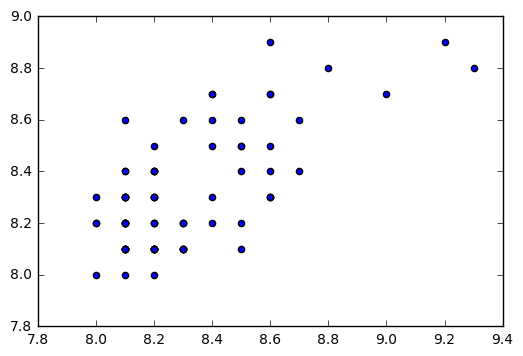

,Feature,Importance %
0,imdbVotes,0.647204
1,Year,0.154906
2,Gross_Revenue,0.124029
4,R,0.048448
3,Metascore,0.021948
8,G,0.003149
5,PG,0.000315
6,PG-13,0.000000
7,NOT RATED,0.000000


In [25]:
# Create a Decision Tree Regression MODEL
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Import and initialize the DecisionTreeRegressor class from scikit-learn
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

# Fit it to the training set
model.fit(X_train, y_train)

# Predict the values of the test set
predictions = model.predict(X_test)

# Evaluate Model
evaluate(X_test,y_test)

R2 Score:  0.522192819468


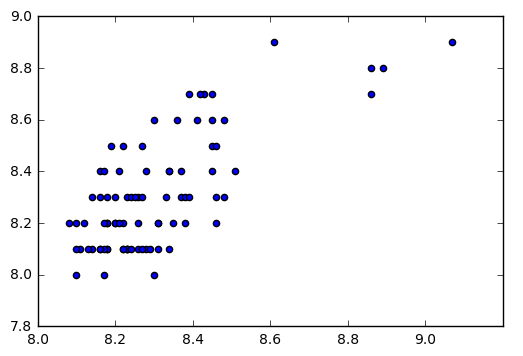

,Feature,Importance %
0,imdbVotes,0.608967
1,Year,0.155412
2,Gross_Revenue,0.131270
3,Metascore,0.071773
4,R,0.012395
6,PG-13,0.006575
5,PG,0.006063
7,NOT RATED,0.004278
8,G,0.003266


In [26]:
# Create Random Forest Model
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict the values of the test set
predictions = model.predict(X_test)

# Evaluate Random Forest Model
evaluate(X_test,y_test)

R2 Score:  0.473223433792


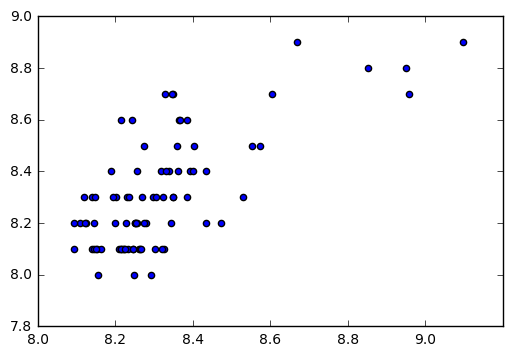

,Feature,Importance %
0,imdbVotes,0.413519
1,Year,0.291628
2,Gross_Revenue,0.171460
3,Metascore,0.098976
8,G,0.011263
5,PG,0.005187
4,R,0.004737
6,PG-13,0.003100
7,NOT RATED,0.000131


In [27]:
# Create Gradient Boost Regressor

# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = GradientBoostingRegressor(random_state=1)
model.fit(X_train, y_train)

# Predict the values of the test set
predictions = model.predict(X_test)

# Evaluate Random Forest Model
evaluate(X_test,y_test)

In [28]:
# Use KBest to figure out what and how many features to use

from sklearn.feature_selection import SelectKBest, f_classif

max_score = 0.00
max_i = 0
for i in range(1,9):
    GBR = GradientBoostingRegressor(random_state=1)
    selector = SelectKBest(f_classif, k=i)
    selected_data = selector.fit_transform(X, y)
    Xbest = pd.DataFrame(selected_data)
    X_train, X_test, y_train, y_test = train_test_split(Xbest, y, test_size=0.33, random_state=42)
    
    GBR.fit(X_train, y_train)
    
    score = GBR.score(X_test, y_test)
    
    if score > max_score:
        max_score = score
        max_i = i
        
print "Kbest features %d with max score %f " %(max_i, max_score)


Kbest features 7 with max score 0.456581 


In [29]:
# Determine which features are best
selector = SelectKBest(f_classif, k=6)
selected_data = selector.fit_transform(X, y)
kbest_columns = X.columns[selector.get_support()]

print kbest_columns.values
print selected_data

['imdbVotes' 'Year' 'Gross_Revenue' 'Metascore' 'PG-13' 'NOT RATED']
[[  3.87628276e+00   4.03075517e-01  -3.85459452e-01   6.99449482e-03
   -3.77096586e-01  -3.34076552e-01]
 [  2.26668276e+00  -5.15795762e-01   4.81382842e-01   2.30118879e+00
   -3.77096586e-01  -3.34076552e-01]
 [  1.17986240e+00  -4.32262009e-01  -1.49712217e-01   6.99449482e-03
   -3.77096586e-01  -3.34076552e-01]
 ..., 
 [ -7.48957568e-01  -8.49930772e-01  -5.87690277e-01  -3.31730050e-12
   -3.77096586e-01  -3.34076552e-01]
 [  3.65145049e-01   1.32194680e+00   2.33914503e+00  -1.71365123e+00
   -3.77096586e-01  -3.34076552e-01]
 [ -8.88261509e-01  -1.30936641e+00  -6.16183273e-01  -4.51844365e-01
   -3.77096586e-01  -3.34076552e-01]]


R2 Score:  0.451607370659


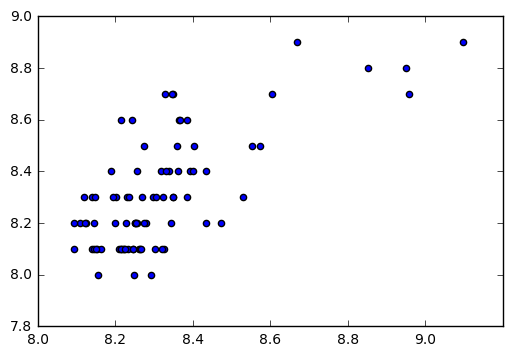

,Feature,Importance %
0,imdbVotes,0.412099
1,Year,0.280609
2,Gross_Revenue,0.204644
3,Metascore,0.097621
4,PG-13,0.004938
5,NOT RATED,0.000089


In [38]:
Xbest = pd.DataFrame(selected_data, columns = [kbest_columns.values])

X_train, X_test, y_train, y_test = train_test_split(Xbest, y, test_size=0.33, random_state=42)

model = GradientBoostingRegressor(random_state=1)
model.fit(X_train, y_train)
        
evaluate(X_test,y_test)

In [34]:
df_important_features = pd.DataFrame({'Feature': X_test.columns.values, 'Importance %': model.feature_importances_})